In [1]:
import numpy as np
import pandas as pd
from keras.models import load_model


MOMENT_data = pd.read_excel('MOMENT2.xlsx')
MOMENT_data=MOMENT_data.dropna()


Using TensorFlow backend.
c:\users\nuno\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\nuno\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\nuno\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1

In [17]:
MOMENT_shape=MOMENT_data.shape
MOMENT_N=MOMENT_shape[0]

def get_info(X,Ls,Y,N,data,loc,_real):
    
    
    for ii in range(0,N):
        q1 = int(data.iloc[ii,0])
        q2 = int(data.iloc[ii,1])
        q3 = int(data.iloc[ii,2])
        
        if _real:
            l1 = data.iloc[ii,7]
            l2 = data.iloc[ii,8]
            l3 = data.iloc[ii,9]
        
        else:
            l1 = data.iloc[ii,3]
            l2 = data.iloc[ii,4]
            l3 = data.iloc[ii,5]
            


        X[ii,q1,0] = 1
        X[ii,q2,0] = 1
        X[ii,q3,0] = 1

        Ls[ii,0,0]= l1
        Ls[ii,1,0]= l2
        Ls[ii,2,0]= l3

        Y[ii,:] = data.iloc[ii][loc]
        
        
        
Real_X = np.zeros((MOMENT_N,13,1))
Real_Ls = np.zeros((MOMENT_N,3,1))
Real_Y = np.zeros((MOMENT_N,13))

prep_Real_X = np.zeros((MOMENT_N,13,1))
prep_Real_Ls = np.zeros((MOMENT_N,3,1))
prep_Real_Y = np.zeros((MOMENT_N,13))

preplog_Real_X = np.zeros((MOMENT_N,13,1))
preplog_Real_Ls = np.zeros((MOMENT_N,3,1))
preplog_Real_Y = np.zeros((MOMENT_N,13))


Inp_X = np.zeros((MOMENT_N,13,1))
Inp_Ls = np.zeros((MOMENT_N,3,1))
Inp_Y = np.zeros((MOMENT_N,13))



MOM_loc =[10,12,15,18,21,24,27,30,33,36,39,42,45]

xticks=[0,1,2,3,4,5,6,7,8,9,10,11,12]



get_info(Real_X, Real_Ls, Real_Y, MOMENT_N, MOMENT_data,MOM_loc,True)
get_info(prep_Real_X, prep_Real_Ls, prep_Real_Y, MOMENT_N, MOMENT_data,MOM_loc,True)
get_info(preplog_Real_X, preplog_Real_Ls, preplog_Real_Y, MOMENT_N, MOMENT_data,MOM_loc,True)
get_info(Inp_X, Inp_Ls, Inp_Y, MOMENT_N, MOMENT_data,MOM_loc,False)



In [13]:
import math
MOMENT_l1_min = min(MOMENT_data.iloc[:,7])
MOMENT_l1_max = max(MOMENT_data.iloc[:,7])
MOMENT_l2_min = min(MOMENT_data.iloc[:,8])
MOMENT_l2_max = max(MOMENT_data.iloc[:,8])
MOMENT_l3_min = min(MOMENT_data.iloc[:,9])
MOMENT_l3_max = max(MOMENT_data.iloc[:,9])

        
for ii in range(0,MOMENT_N):
    prep_Real_Ls[ii,0,0]= (prep_Real_Ls[ii,0,0]-MOMENT_l1_min) / (MOMENT_l1_max-MOMENT_l1_min)
    prep_Real_Ls[ii,1,0]= (prep_Real_Ls[ii,1,0]-MOMENT_l2_min) / (MOMENT_l2_max-MOMENT_l2_min)
    prep_Real_Ls[ii,2,0]= (prep_Real_Ls[ii,2,0]-MOMENT_l3_min) / (MOMENT_l3_max-MOMENT_l3_min)


    
for ii in range(0,MOMENT_N):
    preplog_Real_Ls[ii,0,0]= math.log(preplog_Real_Ls[ii,0,0])
    preplog_Real_Ls[ii,1,0]= math.log(preplog_Real_Ls[ii,1,0])
    preplog_Real_Ls[ii,2,0]= math.log(preplog_Real_Ls[ii,2,0])


Tensor("dense_19/Relu:0", shape=(?, 13), dtype=float32)
Tensor("dense_20/BiasAdd:0", shape=(?, 3), dtype=float32)
Train on 70864 samples, validate on 70864 samples
Epoch 1/30
70864/70864 [==============================] - 11s 157us/step - loss: 257011.7602 - val_loss: 75987.0161
Epoch 2/30
70864/70864 [==============================] - 10s 139us/step - loss: 57909.0649 - val_loss: 46935.1741
Epoch 3/30
70864/70864 [==============================] - 10s 141us/step - loss: 40945.2306 - val_loss: 36232.6268
Epoch 4/30
70864/70864 [==============================] - 10s 140us/step - loss: 33240.1524 - val_loss: 29671.5022
Epoch 5/30
70864/70864 [==============================] - 10s 141us/step - loss: 28509.1467 - val_loss: 26525.2431
Epoch 6/30
70864/70864 [==============================] - 10s 141us/step - loss: 26223.1502 - val_loss: 27520.1294
Epoch 7/30
70864/70864 [==============================] - 10s 140us/step - loss: 24901.5013 - val_loss: 24877.4743
Epoch 8/30
70864/70864 [======

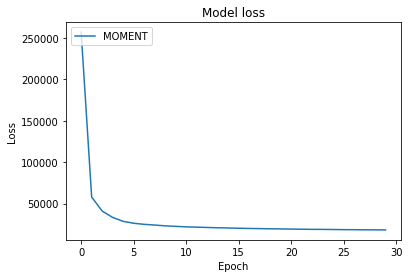

In [8]:

import keras as krs
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
import matplotlib.pyplot as plt
from keras.utils import plot_model

# define two sets of inputs
inputA = krs.Input(shape=(13,1))
inputB = krs.Input(shape=(3,))

# the first branch operates on the first input
Sx = Conv1D(128, kernel_size=1, activation="relu")(inputA)
Sx = Conv1D(64, kernel_size=1, activation="relu")(Sx)
Sx = Conv1D(32, kernel_size=1, activation="relu")(Sx)
Sx = Conv1D(24, kernel_size=1, activation="relu")(Sx)
Sx = Conv1D(13, kernel_size=1, activation="relu")(Sx)
Sx = Flatten()(Sx)
Sx = Dense(13, activation="relu")(Sx)
Sx = krs.Model(inputs=inputA, outputs=Sx)

print(Sx.output)

# the second branch opreates on the second input
Sy = Dense(3, activation="linear")(inputB)
Sy = krs.Model(inputs=inputB, outputs=Sy)

print(Sy.output)

# combine the output of the two branches
Scombined = krs.layers.concatenate([Sx.output, Sy.output])

# apply a FC layer and then a regression prediction on the
# combined outputs
Sz = Dense(64, activation="relu")(Scombined)
Sz = Dense(32, activation="relu")(Sz)
Sz = Dense(24, activation="relu")(Sz)
Sz = Dense(13, activation="linear")(Sz)

# our model will accept the inputs of the two branches and
# then output a single value
Real_model = krs.Model(inputs=[Sx.input, Sy.input], outputs=Sz)
Real_model.compile(loss='mean_squared_error', optimizer=krs.optimizers.adam(clipnorm=1)) 


Real_history = Real_model.fit( [Real_X,Real_Ls[:,:,0]], Real_Y, validation_data=([Real_X,Real_Ls[:,:,0]], Real_Y),
                        epochs=30, batch_size=32, verbose=1)  


#Real_model.save('ROTATIONmodel.h5')
    
plt.figure()
# Plot training & validation loss values
plt.plot(Real_history.history['loss'],label = 'MOMENT')

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

print()

Tensor("dense_25/Relu:0", shape=(?, 13), dtype=float32)
Tensor("dense_26/BiasAdd:0", shape=(?, 3), dtype=float32)
Train on 70864 samples, validate on 70864 samples
Epoch 1/30
70864/70864 [==============================] - 11s 154us/step - loss: 301535.6161 - val_loss: 161916.1330
Epoch 2/30
70864/70864 [==============================] - 10s 141us/step - loss: 110339.5076 - val_loss: 89177.3542
Epoch 3/30
70864/70864 [==============================] - 10s 146us/step - loss: 74552.0023 - val_loss: 60706.6586
Epoch 4/30
70864/70864 [==============================] - 10s 144us/step - loss: 52551.6739 - val_loss: 50744.5157
Epoch 5/30
70864/70864 [==============================] - 10s 144us/step - loss: 46601.0408 - val_loss: 44709.1123
Epoch 6/30
70864/70864 [==============================] - 10s 141us/step - loss: 43257.7919 - val_loss: 41817.1215
Epoch 7/30
70864/70864 [==============================] - 10s 141us/step - loss: 40100.8457 - val_loss: 39975.6123
Epoch 8/30
70864/70864 [====

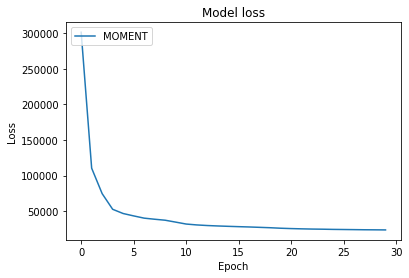

In [9]:

import keras as krs
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
import matplotlib.pyplot as plt
from keras.utils import plot_model

# define two sets of inputs
inputA = krs.Input(shape=(13,1))
inputB = krs.Input(shape=(3,))

# the first branch operates on the first input
Sx = Conv1D(128, kernel_size=1, activation="relu")(inputA)
Sx = Conv1D(64, kernel_size=1, activation="relu")(Sx)
Sx = Conv1D(32, kernel_size=1, activation="relu")(Sx)
Sx = Conv1D(24, kernel_size=1, activation="relu")(Sx)
Sx = Conv1D(13, kernel_size=1, activation="relu")(Sx)
Sx = Flatten()(Sx)
Sx = Dense(13, activation="relu")(Sx)
Sx = krs.Model(inputs=inputA, outputs=Sx)

print(Sx.output)

# the second branch opreates on the second input
Sy = Dense(3, activation="linear")(inputB)
Sy = krs.Model(inputs=inputB, outputs=Sy)

print(Sy.output)

# combine the output of the two branches
Scombined = krs.layers.concatenate([Sx.output, Sy.output])

# apply a FC layer and then a regression prediction on the
# combined outputs
Sz = Dense(64, activation="relu")(Scombined)
Sz = Dense(32, activation="relu")(Sz)
Sz = Dense(24, activation="relu")(Sz)
Sz = Dense(13, activation="linear")(Sz)

# our model will accept the inputs of the two branches and
# then output a single value
Inp_model = krs.Model(inputs=[Sx.input, Sy.input], outputs=Sz)
Inp_model.compile(loss='mean_squared_error', optimizer=krs.optimizers.adam(clipnorm=1)) 


Inp_history = Inp_model.fit( [Inp_X,Inp_Ls[:,:,0]], Inp_Y, validation_data=([Inp_X,Inp_Ls[:,:,0]], Inp_Y),
                        epochs=30, batch_size=32, verbose=1)  


#Inp_model.save('ROTATIONmodel.h5')
    
plt.figure()
# Plot training & validation loss values
plt.plot(Inp_history.history['loss'],label = 'MOMENT')

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

print()

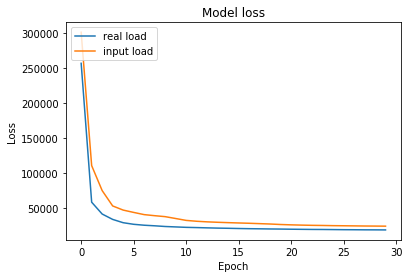

In [10]:
plt.figure()
# Plot training & validation loss values
plt.plot(Real_history.history['loss'],label = 'real load')
plt.plot(Inp_history.history['loss'],label = 'input load')

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


Tensor("dense_43/Relu:0", shape=(?, 13), dtype=float32)
Tensor("dense_44/BiasAdd:0", shape=(?, 3), dtype=float32)
Train on 70864 samples, validate on 70864 samples
Epoch 1/30
70864/70864 [==============================] - 15s 210us/step - loss: 95121.8336 - val_loss: 40308.7818
Epoch 2/30
70864/70864 [==============================] - 13s 183us/step - loss: 33948.8240 - val_loss: 27917.9782
Epoch 3/30
70864/70864 [==============================] - 12s 175us/step - loss: 26430.0424 - val_loss: 23906.6362
Epoch 4/30
70864/70864 [==============================] - 12s 175us/step - loss: 23882.1317 - val_loss: 22663.8214
Epoch 5/30
70864/70864 [==============================] - 13s 185us/step - loss: 22216.1373 - val_loss: 21564.2948
Epoch 6/30
70864/70864 [==============================] - 13s 187us/step - loss: 21193.5000 - val_loss: 21076.3260
Epoch 7/30
70864/70864 [==============================] - 13s 181us/step - loss: 20399.7281 - val_loss: 19707.8311
Epoch 8/30
70864/70864 [=======

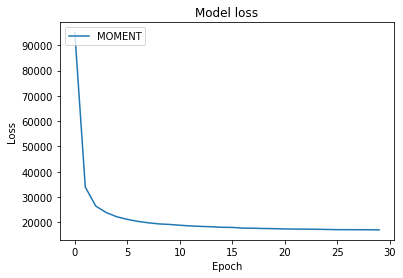

In [18]:

import keras as krs
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
import matplotlib.pyplot as plt
from keras.utils import plot_model

# define two sets of inputs
inputA = krs.Input(shape=(13,1))
inputB = krs.Input(shape=(3,))

# the first branch operates on the first input
Sx = Conv1D(128, kernel_size=1, activation="relu")(inputA)
Sx = Conv1D(64, kernel_size=1, activation="relu")(Sx)
Sx = Conv1D(32, kernel_size=1, activation="relu")(Sx)
Sx = Conv1D(24, kernel_size=1, activation="relu")(Sx)
Sx = Conv1D(13, kernel_size=1, activation="relu")(Sx)
Sx = Flatten()(Sx)
Sx = Dense(13, activation="relu")(Sx)
Sx = krs.Model(inputs=inputA, outputs=Sx)

print(Sx.output)

# the second branch opreates on the second input
Sy = Dense(3, activation="linear")(inputB)
Sy = krs.Model(inputs=inputB, outputs=Sy)

print(Sy.output)

# combine the output of the two branches
Scombined = krs.layers.concatenate([Sx.output, Sy.output])

# apply a FC layer and then a regression prediction on the
# combined outputs
Sz = Dense(64, activation="relu")(Scombined)
Sz = Dense(32, activation="relu")(Sz)
Sz = Dense(24, activation="relu")(Sz)
Sz = Dense(13, activation="linear")(Sz)

# our model will accept the inputs of the two branches and
# then output a single value
prep_Real_model = krs.Model(inputs=[Sx.input, Sy.input], outputs=Sz)
prep_Real_model.compile(loss='mean_squared_error', optimizer=krs.optimizers.adam(clipnorm=1)) 


prep_Real_history = prep_Real_model.fit( [prep_Real_X,prep_Real_Ls[:,:,0]], prep_Real_Y, validation_data=([prep_Real_X,prep_Real_Ls[:,:,0]], prep_Real_Y),
                        epochs=30, batch_size=32, verbose=1)  


#prep_Real_model.save('ROTATIONmodel.h5')
    
plt.figure()
# Plot training & validation loss values
plt.plot(prep_Real_history.history['loss'],label = 'MOMENT')

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

print()

Tensor("dense_49/Relu:0", shape=(?, 13), dtype=float32)
Tensor("dense_50/BiasAdd:0", shape=(?, 3), dtype=float32)
Train on 70864 samples, validate on 70864 samples
Epoch 1/30
70864/70864 [==============================] - 18s 249us/step - loss: 98158.9262 - val_loss: 43887.8856
Epoch 2/30
70864/70864 [==============================] - 15s 211us/step - loss: 38911.4205 - val_loss: 34403.4154
Epoch 3/30
70864/70864 [==============================] - 15s 206us/step - loss: 31252.3140 - val_loss: 29398.0772
Epoch 4/30
70864/70864 [==============================] - 14s 199us/step - loss: 26882.8681 - val_loss: 25063.1069
Epoch 5/30
70864/70864 [==============================] - 14s 200us/step - loss: 24847.9129 - val_loss: 23616.6972
Epoch 6/30
70864/70864 [==============================] - 15s 208us/step - loss: 23847.6490 - val_loss: 22567.9545
Epoch 7/30
70864/70864 [==============================] - 17s 235us/step - loss: 23093.0305 - val_loss: 22440.6889
Epoch 8/30
70864/70864 [=======

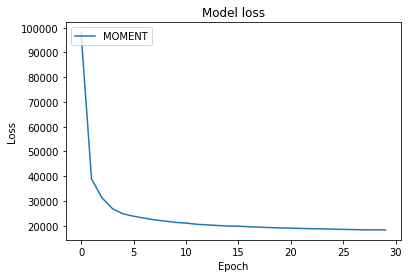

In [19]:

import keras as krs
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
import matplotlib.pyplot as plt
from keras.utils import plot_model

# define two sets of inputs
inputA = krs.Input(shape=(13,1))
inputB = krs.Input(shape=(3,))

# the first branch operates on the first input
Sx = Conv1D(128, kernel_size=1, activation="relu")(inputA)
Sx = Conv1D(64, kernel_size=1, activation="relu")(Sx)
Sx = Conv1D(32, kernel_size=1, activation="relu")(Sx)
Sx = Conv1D(24, kernel_size=1, activation="relu")(Sx)
Sx = Conv1D(13, kernel_size=1, activation="relu")(Sx)
Sx = Flatten()(Sx)
Sx = Dense(13, activation="relu")(Sx)
Sx = krs.Model(inputs=inputA, outputs=Sx)

print(Sx.output)

# the second branch opreates on the second input
Sy = Dense(3, activation="linear")(inputB)
Sy = krs.Model(inputs=inputB, outputs=Sy)

print(Sy.output)

# combine the output of the two branches
Scombined = krs.layers.concatenate([Sx.output, Sy.output])

# apply a FC layer and then a regression prediction on the
# combined outputs
Sz = Dense(64, activation="relu")(Scombined)
Sz = Dense(32, activation="relu")(Sz)
Sz = Dense(24, activation="relu")(Sz)
Sz = Dense(13, activation="linear")(Sz)

# our model will accept the inputs of the two branches and
# then output a single value
preplog_Real_model = krs.Model(inputs=[Sx.input, Sy.input], outputs=Sz)
preplog_Real_model.compile(loss='mean_squared_error', optimizer=krs.optimizers.adam(clipnorm=1)) 


preplog_Real_history = preplog_Real_model.fit( [preplog_Real_X,preplog_Real_Ls[:,:,0]], preplog_Real_Y, validation_data=([preplog_Real_X,preplog_Real_Ls[:,:,0]], preplog_Real_Y),
                        epochs=30, batch_size=32, verbose=1)  


#preplog_Real_model.save('ROTATIONmodel.h5')
    
plt.figure()
# Plot training & validation loss values
plt.plot(preplog_Real_history.history['loss'],label = 'MOMENT')

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

print()

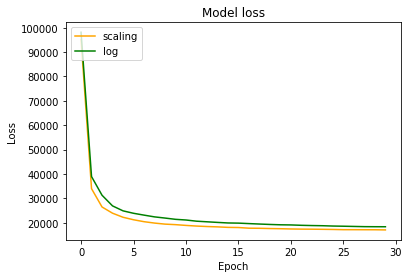

In [27]:
plt.figure()
# Plot training & validation loss values
#plt.plot(Real_history.history['loss'],label = 'real load')
plt.plot(prep_Real_history.history['loss'],label = 'scaling',color='orange')
plt.plot(preplog_Real_history.history['loss'],label = 'log',color='green')

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()